In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import scipy.cluster.hierarchy as sc

In [5]:
from sklearn import datasets

In [6]:
from sklearn.cluster import AgglomerativeClustering

its a bottom up approach ,in which the algorithm starts with taking all data points as  single clusters and merging them until one cluster is left

In [8]:
#iris(sangpoo) ia a flower
iris = datasets.load_iris()

In [9]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [10]:
iris_data=pd.DataFrame(iris.data)

In [11]:
iris_data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
iris_data.columns = iris.feature_names

In [13]:
iris_data['flower_type'] = iris.target

In [14]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [15]:
iris_x = iris_data.iloc[:,[0,1,2,3]].values


In [16]:
iris_y = iris_data.iloc[:,4].values

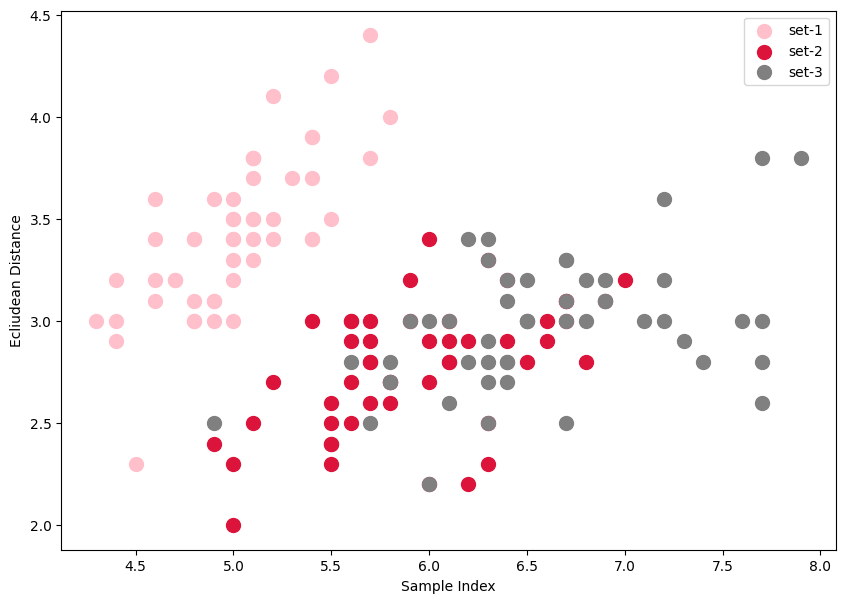

In [30]:
plt.figure(figsize = (10,7))
plt.scatter(iris_x[iris_y == 0,0],iris_x[iris_y == 0,1],s = 100,c='pink',label ='set-1')
plt.scatter(iris_x[iris_y == 1,0],iris_x[iris_y == 1,1],s = 100,c='crimson',label ='set-2')
plt.scatter(iris_x[iris_y == 2,0],iris_x[iris_y == 2,1],s = 100,c='grey',label ='set-3')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Ecliudean Distance')
plt.show()

# create a dendrogram

Text(0.5, 1.0, 'Dendrograms')

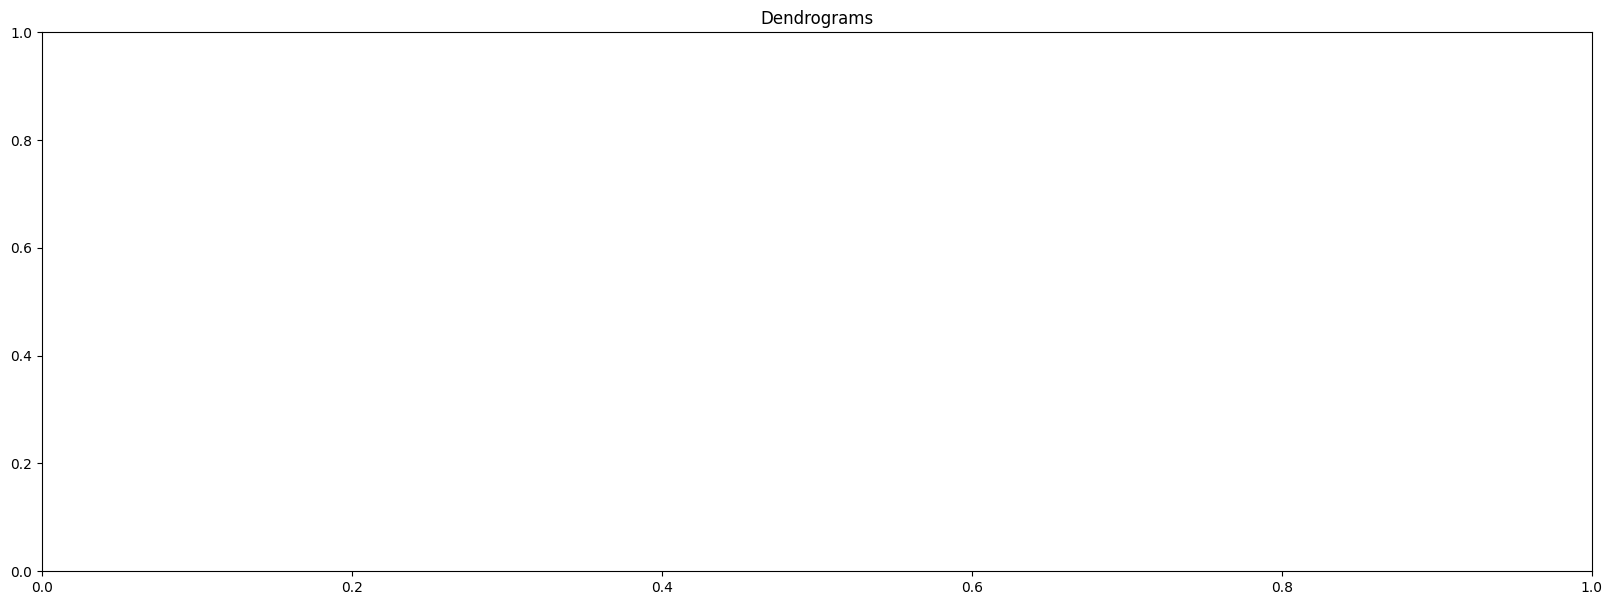

In [36]:
plt.figure(figsize =(20,7))#20-width,7-height
plt.title("Dendrograms")

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [22.5, 22.5, 52.5, 52.5],
  [5.0, 5.0, 37.5, 37.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [83.75, 83.75, 123.75, 123.75],
  [21.25, 21.25, 103.75, 103.75],
  [195.0, 195.0, 205.0, 205.0],
  [185.0, 185.0, 200.0, 200.0],
  [175.0, 175.0, 192.5, 192.5],
  [165.0, 165.0, 183.75, 183.75],
  [155.0, 155.0, 174.375, 174.375],
  [62.5, 62.5, 164.6875, 164.6875],
  [215.0, 215.0, 225.0, 225.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [242.5, 242.5, 281.25, 281.25],
  [220.0, 220.0, 261.875, 261.875],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [365.0, 36

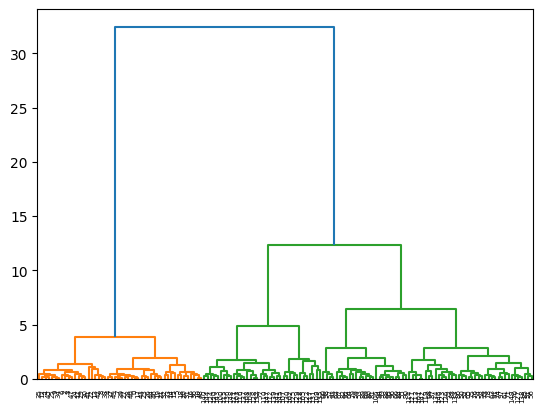

In [32]:
sc.dendrogram(sc.linkage(iris_x,method = 'ward'))

Text(0.5, 0, 'Ecluidean Distance')

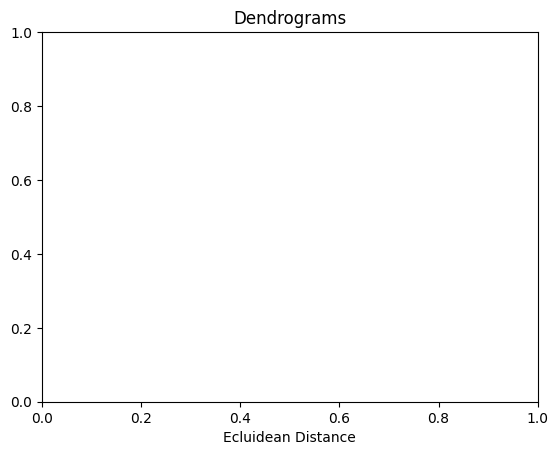

In [35]:
plt.title("Dendrograms")
plt.xlabel('Sample Index')
plt.xlabel("Ecluidean Distance")

Text(0.5, 0, 'Ecluidean Distance')

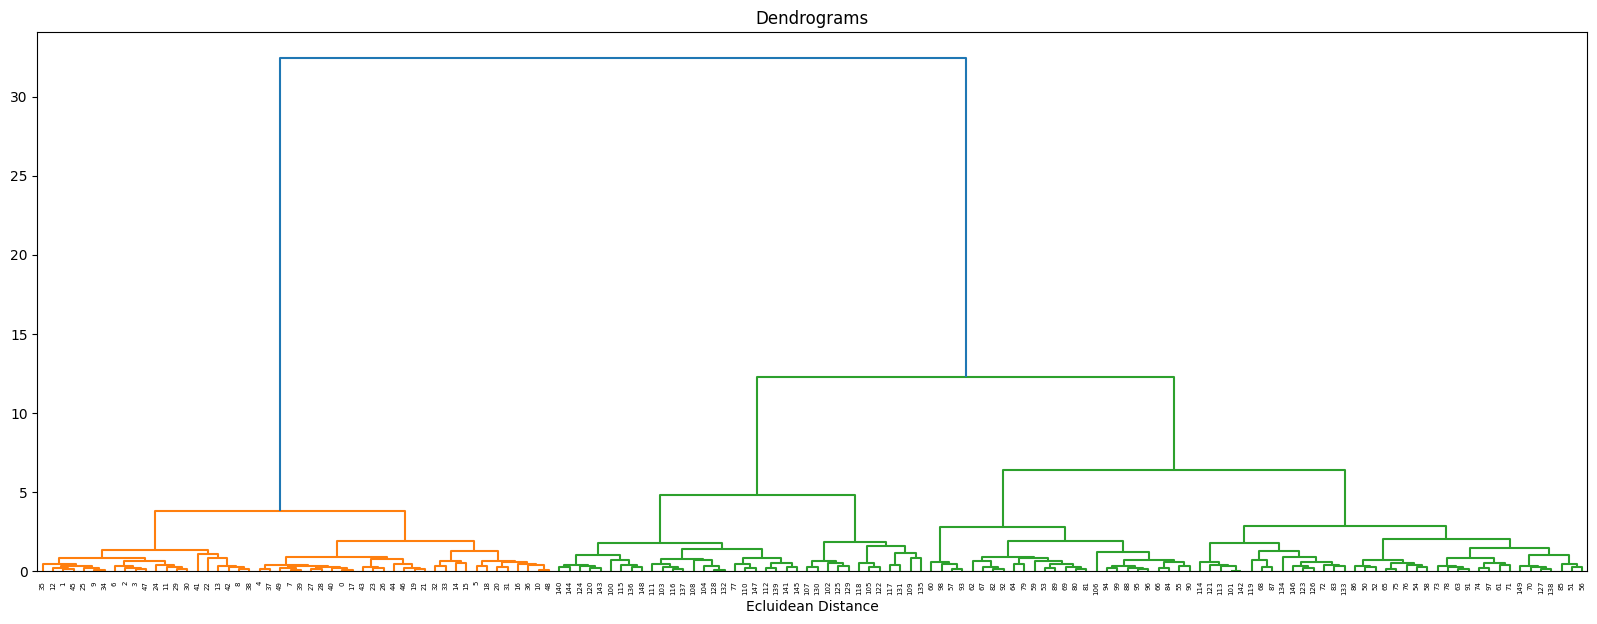

In [38]:
plt.figure(figsize =(20,7))
plt.title("Dendrograms")
sc.dendrogram(sc.linkage(iris_x,method='ward'))
plt.title("Dendrograms")
plt.xlabel('Sample Index')
plt.xlabel("Ecluidean Distance")